In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
active_load_vi_curve = pd.read_csv('active_load_vi_curve.csv')
active_load_vi_curve = active_load_vi_curve.drop([0])
active_load_vi_curve.dropna(inplace=True)
active_load_vi_curve = active_load_vi_curve.astype('float64')
active_load_vi_curve.columns

Index(['dT0C', 'Unnamed: 1', 'dT30C', 'Unnamed: 3', 'dT60C', 'Unnamed: 5'], dtype='object')

In [3]:
active_load_dT0C_r = np.gradient(active_load_vi_curve['Unnamed: 1'].values, active_load_vi_curve['dT0C'].values)
active_load_dT30C_r = np.gradient(active_load_vi_curve['Unnamed: 3'].values, active_load_vi_curve['dT30C'].values)
active_load_dT60C_r = np.gradient(active_load_vi_curve['Unnamed: 5'].values, active_load_vi_curve['dT60C'].values)

In [4]:
passive_load_vi_curve = pd.read_csv('passive_load_vi_curve.csv')
passive_load_vi_curve = passive_load_vi_curve.drop([0])
passive_load_vi_curve.dropna(inplace=True)
passive_load_vi_curve = passive_load_vi_curve.astype('float64')

In [5]:
passive_load_dT0C_r = np.gradient(passive_load_vi_curve['Unnamed: 1'].values, passive_load_vi_curve['dT0C'].values)
passive_load_dT30C_r = np.gradient(passive_load_vi_curve['Unnamed: 3'].values, passive_load_vi_curve['dT30C'].values)
passive_load_dT60C_r = np.gradient(passive_load_vi_curve['Unnamed: 5'].values, passive_load_vi_curve['dT60C'].values)

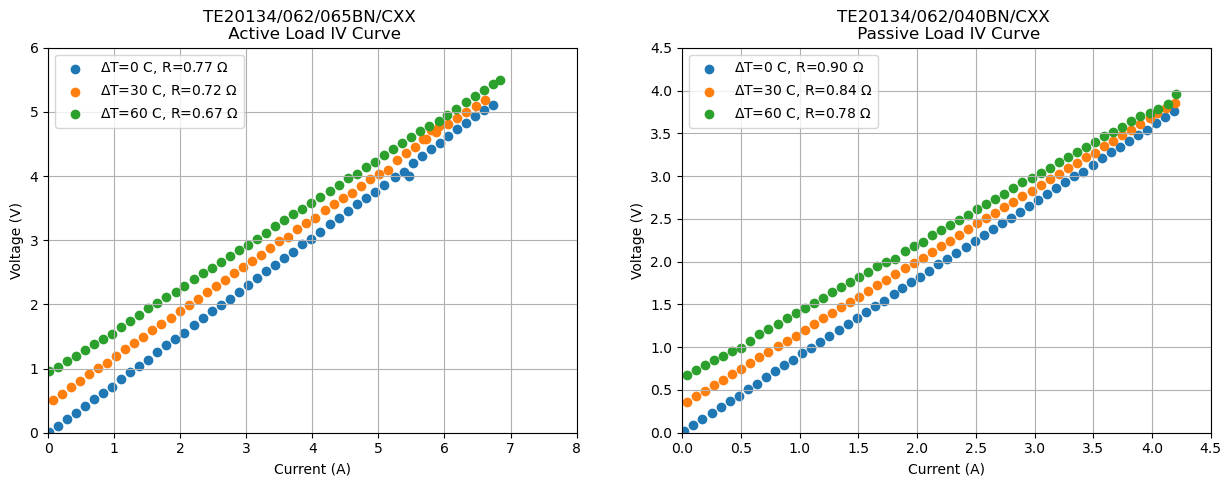

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(active_load_vi_curve['dT0C'].values, active_load_vi_curve['Unnamed: 1'].values, label=r'$\Delta$'+f'T=0 C, R={np.median(active_load_dT0C_r):0.2f}'+r' $\Omega$')
plt.scatter(active_load_vi_curve['dT30C'].values, active_load_vi_curve['Unnamed: 3'].values, label=r'$\Delta$'+f'T=30 C, R={np.median(active_load_dT30C_r):0.2f}'+r' $\Omega$')
plt.scatter(active_load_vi_curve['dT60C'].values, active_load_vi_curve['Unnamed: 5'].values, label=r'$\Delta$'+f'T=60 C, R={np.median(active_load_dT60C_r):0.2f}'+r' $\Omega$')
plt.grid(True)
plt.xlim([0.0, 8.0])
plt.ylim([0.0, 6.0])
plt.title('TE20134/062/065BN/CXX \n Active Load IV Curve')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.subplot(122)
plt.scatter(passive_load_vi_curve['dT60C'].values, passive_load_vi_curve['Unnamed: 5'].values, label=r'$\Delta$'+f'T=0 C, R={np.median(passive_load_dT60C_r):0.2f}'+r' $\Omega$')
plt.scatter(passive_load_vi_curve['dT30C'].values, passive_load_vi_curve['Unnamed: 3'].values, label=r'$\Delta$'+f'T=30 C, R={np.median(passive_load_dT30C_r):0.2f}'+r' $\Omega$')
plt.scatter(passive_load_vi_curve['dT0C'].values, passive_load_vi_curve['Unnamed: 1'].values, label=r'$\Delta$'+f'T=60 C, R={np.median(passive_load_dT0C_r):0.2f}'+r' $\Omega$')
plt.grid(True)
plt.xlim([0.0, 4.5])
plt.ylim([0.0, 4.5])
plt.title('TE20134/062/040BN/CXX \n Passive Load IV Curve')
plt.xlabel('Current (A)')
plt.ylabel('Voltage (V)')
plt.legend()